# Investigación Corta 2 

## Aprendizaje supervisado

Se explorará los métodos de aprendizaje supervizado descritos a continuación, a la vez que se analizará la variación de algunos hiper-parámetros que generen modelos de mayor precisión:

Regresión Logística, KNN, Regresión Lineal, Clasificador con Máquinas Vectoriales de Soporte, Clasificador Pasivo Agresivo y un método de ensamble que se describirá en su respectiva sección

Para ejemplificar el uso de los métodos de aprendizaje, se utilizará el conjunto de datos de dos dimensiones "heart-disease-uci", el cual describe varios atributos físicos y cardiovasculares de pacientes en distintos rangos etarios, así como la presencia de algún padecimiento cardíaco (https://www.kaggle.com/ronitf/heart-disease-uci).

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('heart.csv', delimiter = ',')

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Aleatorizamos el conjunto de datos, para reducir la posibilidad de un sesgo en la elección de segmentos de training y test. Para ello, indicamos a la función *sample* que la proporción de la muestra sea de 1, con lo que ha de retornar todas las filas, en orden aleatorio.
Se reestablece los índices, a la vez que se indica *no* almacenar los índices antiguos.

In [2]:
df = df.sample(frac=1).reset_index(drop=True)

Creamos los conjuntos de pruebas y entrenamiento

In [3]:
x_train, x_test, y_train, y_test = train_test_split(df, df.target, test_size=0.33)

### Regresión Logística

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Para este método, exploramos los hiper-parámetros *solver* y *max_iter*, que determinan, respectivamente, el algorimto a utilizar para la optimización de parámetros, y la cantidad máxima de iteraciones a ejecutar para que converja cada algoritmo.

Se obtuvo una mejor generalización con el algoritmo 'sag' (Stochastic Average Gradient descent), el cual aunque se especializa en set de datos de gran tamaño, tuvo un desempeño satisfactorio en el conjunto de datos presentado.

In [20]:
from sklearn.linear_model import LogisticRegression

# ignoramos los warning para evitar spam de los solver que no convergen con 
# la cantidad de iteraciones especificada
import warnings
warnings.filterwarnings("ignore")

LogRegs = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
rango = range(100, 1000, 20)

# diccionarios con el solver como llave(LogRegs). Almacenaremos los scores 
# obtenidos para cada parámetro max_iter, para cada solver
train_scores = {}
test_scores = {}

for lr_slv in LogRegs:
    train_scores[lr_slv] = [] # @J@ no se puede hacer append a una llave inexistente
    test_scores[lr_slv] = []
    for i in rango:
        clf = LogisticRegression(max_iter=i, class_weight=None, solver=lr_slv).fit(x_train, y_train)

        train_scores[lr_slv].append(clf.score(x_train, y_train)) # @J@
        test_scores[lr_slv].append(clf.score(x_test, y_test))

Ploteamos los resultados

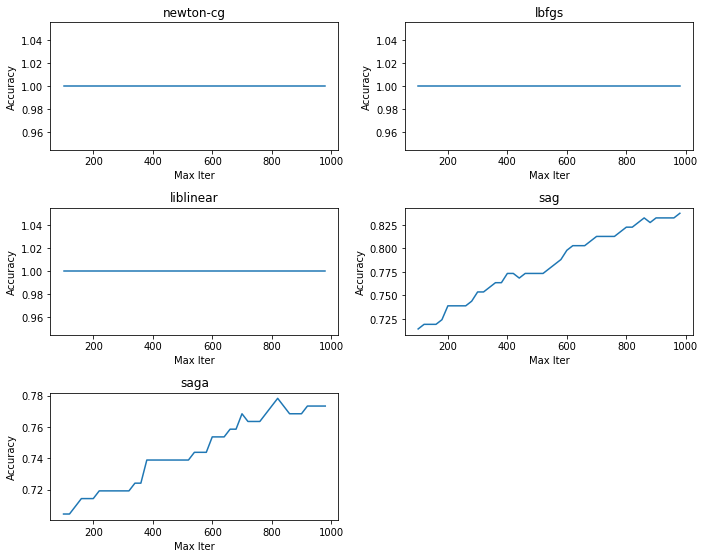

In [21]:
import matplotlib.pyplot as plt
#%matplotlib inline

layout = (4, 2)
plt.figure(figsize=(10, 10))

pl1 = plt.subplot2grid(layout, (0, 0))
pl2 = plt.subplot2grid(layout, (0, 1))
pl3 = plt.subplot2grid(layout, (1, 0))
pl4 = plt.subplot2grid(layout, (1, 1))
pl5 = plt.subplot2grid(layout, (2, 0))

for pl,n in [(pl1, 'newton-cg'),
             (pl2, 'lbfgs'),
             (pl3, 'liblinear'),
             (pl4, 'sag'),
             (pl5, 'saga')]:
    pl.plot(rango, train_scores[n])
    pl.set_title(n)
    pl.set_ylabel("Accuracy")
    pl.set_xlabel("Max Iter")
    
plt.tight_layout()

#test_scores
#train_scores

Se experimentó variando el parametro *C* el resultado fue exactamente igual para cada uno de sus valores

### KNN

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

En el caso de KNN, variamos la cantidad de vecinos a utilizar, así como el método de cálculo de distancia entre puntos. Se obtuvo una mejor generalización con aproximadamente 6 vecinos.

Además, se muestra cómo el normalizar los datos afecta de manera positiva los resultados de los modelos presentados.

In [68]:
from sklearn import preprocessing

# normalizamos los datos, indicamos al DataFrame de pandas que utilice las mismas columnas del set inicial
norm_Xtrain = pd.DataFrame(preprocessing.normalize(x_train), columns = x_train.columns)
norm_Xtest = pd.DataFrame(preprocessing.normalize(x_test), columns = x_train.columns)

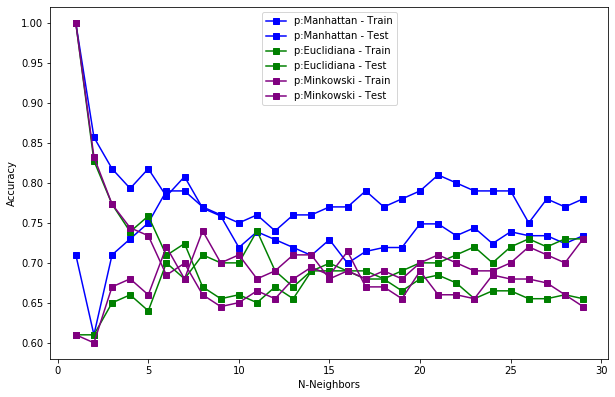

In [7]:
from sklearn.neighbors import KNeighborsClassifier

nneigh = range(1, 30)
PPP = [1, 2, 3]
pNames = ['', 'Manhattan', 'Euclidiana', 'Minkowski']
pColor = ['', 'blue', 'green', 'purple']

# diccionarios con el parámetro P como llave(PPP). Almacenaremos los scores 
# obtenidos para cada selecciön de cantidad de vecinos, para cada P
train_scores = {}
test_scores = {}

plt.figure(figsize=(10, 10))
knnPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

for pp in PPP:
    train_scores[pp] = []
    test_scores[pp] = []
    for n in nneigh:
        clf = KNeighborsClassifier(n_neighbors=n, p=pp).fit(norm_Xtrain, y_train)

        train_scores[pp].append(clf.score(norm_Xtrain, y_train))
        test_scores[pp].append(clf.score(norm_Xtest, y_test))
    
    knnPlot.plot(nneigh, train_scores[pp], "s-", label="p:%s - Train" % pNames[pp], color = pColor[pp])
    knnPlot.plot(nneigh, test_scores[pp], "s-", label="p:%s - Test" % pNames[pp], color = pColor[pp])

knnPlot.set_ylabel("Accuracy")
knnPlot.set_xlabel("N-Neighbors")
knnPlot.legend(loc="upper center") ## o tambien "upper right, lower left..." para ubicar el cuadrito de legends

#train_scores

Se muestra acontinuación los resultados de un modelo creado sobre los datos originales, sin normalizar

<img src='imgs/knn_no_norm.JPG' style="width:50%; float:center">

Se experimentó variando los parámetros *algorithm* (ball_tree, kd_tree, brute), y *leaf_size*;  el resultado fue exactamente igual para toda variación, por lo que no se utilizaron para la demostración. Se presentan acontinuación capturas de ambos casos:

<img src='imgs/knn_leafSize_param.JPG' style="width:50%; float:left"/>
<img src='imgs/knn_algorithm_param.JPG' style="width:50%; float:right; margin:79px 0 0 0"/>

### Regresión Lineal

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

El método de Regresión Lineal es uno de los más simples. Su generalización resulta ser muy acertada para el ejemplo explorado en esta investigación corta, lo cual evidencia la naturaleza lineal de los datos. El método no posee hiper-parámetros relevantes al problema.

In [48]:
# Naïve Bayes Multinomial, por mera curiosidad.
# Al utilizar gaussiano, se obtuvo siempre un score de 1
from sklearn.naive_bayes import MultinomialNB

nbm = MultinomialNB().fit(x_train, y_train)

print("Training set score: {:.3f}".format(nbm.score(x_train, y_train)))
print("Test set score: {:.3f}".format(nbm.score(x_test, y_test)))

Training set score: 0.877
Test set score: 0.880


In [9]:
from sklearn.linear_model import LinearRegression


lr = LinearRegression().fit(norm_Xtrain, y_train)

print("Score para el set de entrenamiento: {:.3f}".format(lr.score(norm_Xtrain, y_train)))
print("Score para el set de pruebas: {:.3f}".format(lr.score(norm_Xtest, y_test)))

Score para el set de entrenamiento: 0.979
Score para el set de pruebas: 0.980


### SVC

Para este método es también necesario el normalizar los datos, de lo contrario, sin importar el kernel, las predicciones resultan muy sesgadas (score invariable de 1). Esto es debido a la naturaleza del metódo: no es invariante a la escala.

Para la demostración se varió tanto el hiper-parámetro *kernel* como el de penalización *C*.

Debido a la prevalencia de datos positivos sobre negativos, se especifica el hiper-parámetro *class_weight* con 'balanced'.

Se obtuvo una generalización más satisfactoria con un C=~190, y el kernel 'linear', lo cual es consistente con la naturaleza lineal de los datos demostrada en el método anterior (Regresión Lineal).

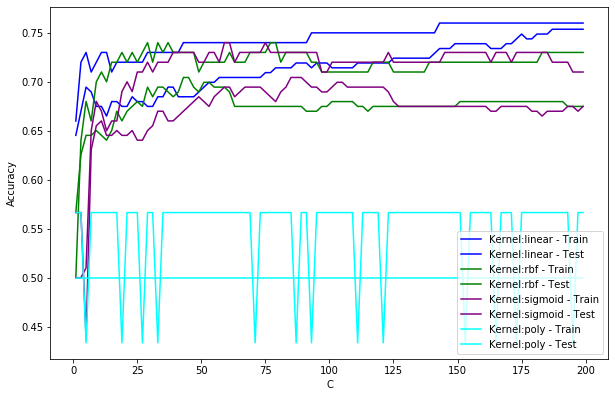

In [71]:
from sklearn.svm import SVC

# diccionarios con el kernel como llave(ker). Almacenaremos los scores 
# obtenidos para cada parámetro C, para cada kernel
train_scores = {}
test_scores = {}

ker = ['linear', 'rbf', 'sigmoid', 'poly']#, 'precomputed'] requiere de un kernel personalizado
kColor = ['blue', 'green', 'purple', 'cyan']
myC = range(1, 200, 2)

plt.figure(figsize=(10, 10))
svmPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

kIdx = 0

for k in ker:
    train_scores[k] = []
    test_scores[k] = []
    for c in myC:
        clf = svc = SVC(kernel=k, C=c, cache_size=700, class_weight='balanced').fit(norm_Xtrain, y_train)

        train_scores[k].append(clf.score(norm_Xtrain, y_train))
        test_scores[k].append(clf.score(norm_Xtest, y_test))
    
    svmPlot.plot(myC, train_scores[k], label="Kernel:%s - Train" % k, color=kColor[kIdx])
    svmPlot.plot(myC, test_scores[k], label="Kernel:%s - Test" % k, color=kColor[kIdx])
    kIdx+=1

svmPlot.set_ylabel("Accuracy")
svmPlot.set_xlabel("C")
svmPlot.legend()
svmPlot.legend(loc="lower right")

#train_scores

### Clasificador Pasivo Agresivo

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html#sklearn.linear_model.PassiveAggressiveClassifier

Éste método de aprendizaje es utilizado principalmente para aprendizaje a gran escala, por lo que en el ejemplo utilizado, podrá notarse una deficiente generalización, y un comportamiento errático conforme varía el hiper-parámetro de regularización *C*.

Su nombre deriva de la utilización que hace el algoritmo de los pesos de cada feature, de los cuales, en caso de una clasificación acertada dado el correspondiente peso, el mismo se mantiene, por lo que se dice que es un comportamiento **pasivo**, por otro lado, si la clasificación es errónea, se hace una búsqueda de un nuevo peso el cual debe estar lo más cercano posible al anterior, en un comportamiento que se describe como **agresivo**.

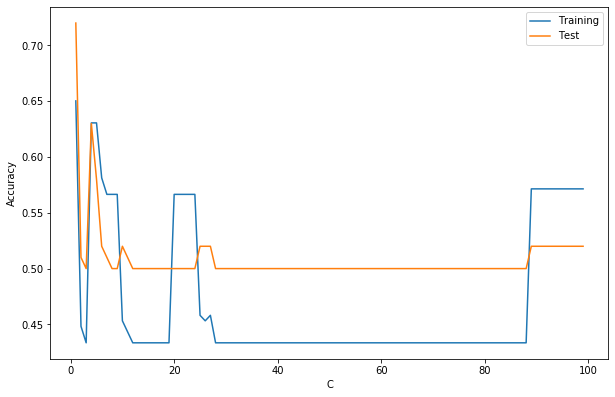

In [64]:
from sklearn.linear_model import PassiveAggressiveClassifier

train_scores = []
test_scores = []

myC = range(1, 100)

plt.figure(figsize=(10, 10))
pacPlot = plt.subplot2grid((3, 1), (1, 0), rowspan=2)

for c in myC:    
    clf = PassiveAggressiveClassifier(random_state=0, C=c).fit(norm_Xtrain, y_train)
    train_scores.append(clf.score(norm_Xtrain, y_train))
    test_scores.append(clf.score(norm_Xtest, y_test))

pacPlot.plot(myC, train_scores, label="Training")
pacPlot.plot(myC, test_scores, label="Test")

pacPlot.set_ylabel("Accuracy")
pacPlot.set_xlabel("C")
pacPlot.legend()

#print("C: {} - Score Training Set: {:.3f}".format(c, clf.score(norm_Xtrain, y_train)))
#print("        Score Testing  Set: {:.3f}".format(clf.score(norm_Xtest, y_test)))



Se descartó el uso del hiper-parámetro de *número de iteraciones* dado que no contribuía en lo absoluto con el resultado de la generalización, tal y como se aprecia en la siguiente captura (datos no normalizados):

<img src="imgs/passive_aggresive_niter_param.JPG" style="width:50%;float:center">

### Método de Ensamble: VotingClassifier

Los métodos de ensamble consisten en la combinación de varios métodos de modelado, de manera que se complementen sus fortalezas, y se aplaque en cierta medida sus carencias.

En el caso del Voting Classifier, se toma las estimaciones de probabilidad de clase de distintos métodos de aprendizaje, y se utiliza un voto de mayoría (*hard vote*) o un promedio de la predicción de probabilidades proveídas individualmente por cada modelo incorporado (*soft vote*).

En el ejemplo presentado abajo, se halló que el *soft voting* provee una mejora en la generalización de un ~0.03 en la certeza del método de ensamble.

Para los métodos de aprendizaje a incorporar, se seleccionó dos de los expuestos ateriormente, así como el Naïve Bayes Multinomial con participación especial. La selección de hiper-parámetros se realizó basado en una estimación visual de los mejores resultados obtenidos por cada modelo.

Posteriormente, se utilizó validación cruzada para mostrar los scores obtenidos en promedio, y su desviación estándar.

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

clf1 = LogisticRegression(max_iter=900, class_weight=None, solver='sag')
clf2 = MultinomialNB()
clf3 = KNeighborsClassifier(n_neighbors=6, p=1) #Manhattan

eclf = VotingClassifier(estimators=[('lr', clf1), ('mnb', clf2), ('knn', clf3)], voting='soft')

print("---------------Data set original---------------")
for clf, label in zip([clf1, clf2, clf3, eclf], ['Regresión Logística', 'NB Multinomial', 'KNN', 'Ensamble']):
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
    print("Certeza: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

print("------------------Normalizado-------------------")

for clf, label in zip([clf1, clf2, clf3, eclf], ['Regresión Logística', 'NB Multinomial', 'KNN', 'Ensamble']):
    scores = cross_val_score(clf, norm_Xtrain, y_train, cv=5, scoring='accuracy')
    print("Certeza: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    

---------------Data set original---------------
Certeza: 0.803 (+/- 0.07) [Regresión Logística]
Certeza: 0.867 (+/- 0.05) [NB Multinomial]
Certeza: 0.705 (+/- 0.05) [KNN]
Certeza: 0.847 (+/- 0.07) [Ensamble]
------------------Normalizado-------------------
Certeza: 0.601 (+/- 0.04) [Regresión Logística]
Certeza: 0.567 (+/- 0.01) [NB Multinomial]
Certeza: 0.651 (+/- 0.10) [KNN]
Certeza: 0.680 (+/- 0.07) [Ensamble]


# Fuentes consultadas

https://seaborn.pydata.org/tutorial/distributions.html

https://machinelearningmastery.com/rescaling-data-for-machine-learning-in-python-with-scikit-learn/

https://www.programcreek.com/python/example/102373/matplotlib.pyplot.subplot2grid

Documentación de scikit learn para cada método utilizado